
Cross-sectional MRI Data in Young, Middle Aged, Nondemented and Demented Older Adults: This set consists of a cross-sectional collection of 416 subjects aged 18 to 96. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 100 of the included subjects over the age of 60 have been clinically diagnosed with very mild to moderate Alzheimer’s disease (AD). Additionally, a reliability data set is included containing 20 nondemented subjects imaged on a subsequent visit within 90 days of their initial session.


Context:
The Open Access Series of Imaging Studies (OASIS) is a project aimed at making MRI data sets of the brain freely available to the scientific community. By compiling and freely distributing MRI data sets, we hope to facilitate future discoveries in basic and clinical neuroscience. OASIS is made available by the Washington University Alzheimer’s Disease Research Center, Dr. Randy Buckner at the Howard Hughes Medical Institute (HHMI)( at Harvard University, the Neuroinformatics Research Group (NRG) at Washington University School of Medicine, and the Biomedical Informatics Research Network (BIRN).


Data: 


*   ID: Identification (cat)
*   M/F: Gender (cat)
*   Hand: Dominant Hand (cat: R or L)
*   Age: Age in Years (num)
*   Educ: Education Level (cat: 1-5)
*   SES: Socioeconomic status (cat: 1-5)
*   MMSE: Mini Mental State Evaluation (num)
*   CDR: Clinical Dementia Rating (cat: 0-2)
*   eTIV: Estimated Total Intercranial Volume (num)
*   nWBV: Normalized Whole Brain Volume (num)
*   ATS: Atlas Scaling Factor (num)
*   Delay: ?












In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Exploratory Data Analysis

In [2]:
cross_sec_filepath= '/content/drive/My Drive/data for colab/mri and alzheimers/datasets_1980_3398_oasis_cross-sectional.csv'
raw_data=pd.read_csv(cross_sec_filepath)
raw_data.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


In [4]:
#check for null values
raw_data.isnull().sum()

ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64

In [86]:
raw_data.CDR.unique()

array([0. , 0.5, nan, 1. , 2. ])

CDR is the target variable, which contains 4 classes (0, 0.5, 1, 2). There are only 235 non-null CDR values, therefore only these data will be used to train and validate the model. Later, we could predict CDR in the remaining data, but with no validation. 

In [5]:
raw_data.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
mean,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750,2.75000
50%,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000,11.00000
75%,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250,30.75000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000,89.00000


In [6]:
raw_data.Hand.unique()

array(['R'], dtype=object)

This dataset only contains right-handed individuals, so we can drop this column.

In [7]:
data=raw_data.dropna(axis=0, subset=['CDR'])
data.drop('Hand', axis=1, inplace=True)
data.drop('ID',axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 415
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M/F     235 non-null    object 
 1   Age     235 non-null    int64  
 2   Educ    235 non-null    float64
 3   SES     216 non-null    float64
 4   MMSE    235 non-null    float64
 5   CDR     235 non-null    float64
 6   eTIV    235 non-null    int64  
 7   nWBV    235 non-null    float64
 8   ASF     235 non-null    float64
 9   Delay   0 non-null      float64
dtypes: float64(7), int64(2), object(1)
memory usage: 20.2+ KB


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
#no non-null values for "delay", so drop this column too
data.drop('Delay', inplace=True, axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
data['M/F'].unique()

array(['F', 'M'], dtype=object)

M/F will have to be one-hot encoded. 

In [10]:
#what's the distribution of dementia ratings among this dataset?
data.CDR.value_counts()

0.0    135
0.5     70
1.0     28
2.0      2
Name: CDR, dtype: int64

This data is skewed towards lower values of CDR.


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 415
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M/F     235 non-null    object 
 1   Age     235 non-null    int64  
 2   Educ    235 non-null    float64
 3   SES     216 non-null    float64
 4   MMSE    235 non-null    float64
 5   CDR     235 non-null    float64
 6   eTIV    235 non-null    int64  
 7   nWBV    235 non-null    float64
 8   ASF     235 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 18.4+ KB


SES is the only category with null values now. How should we impute them?

count    216.000000
mean       2.490741
std        1.120593
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: SES, dtype: float64

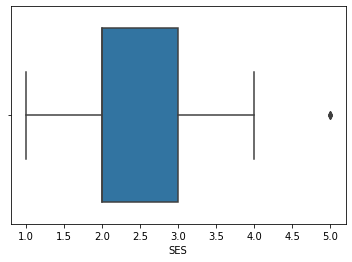

In [12]:
sns.boxplot(x=data.SES)
data.SES.describe()

Since there is only one outlier, SES is categorical, and the dataset is relatively small, we'll try KNN imputer to start.

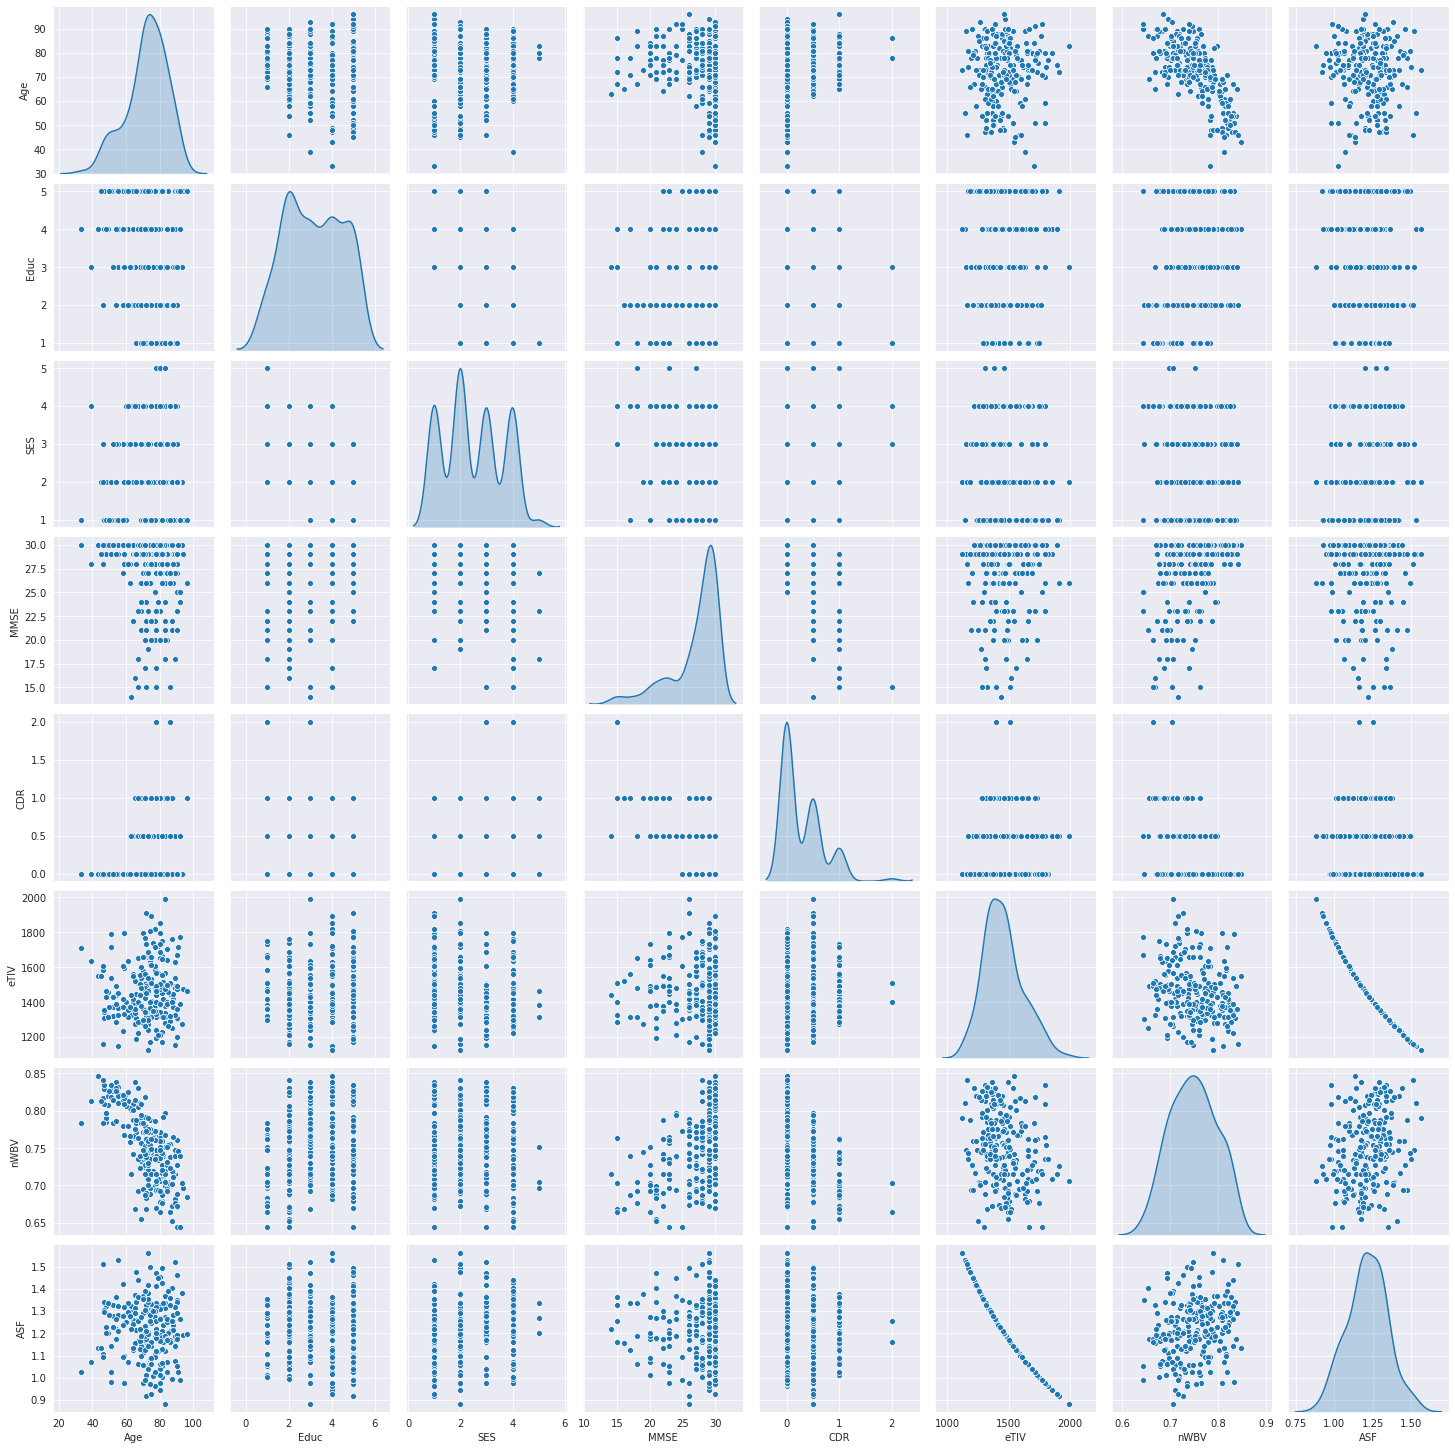

In [13]:
#Let's look at the pairplots
sns.set_style('darkgrid')
sns.pairplot(data, diag_kind="kde")

eTIV and ASF are related by definition. This mulitcolinearity shouldn't be a problem if we use tree classificiation, but let's remove ASF for now anyway.

In [14]:
data.drop('ASF', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
data.head()

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV
0,F,74,2.0,3.0,29.0,0.0,1344,0.743
1,F,55,4.0,1.0,29.0,0.0,1147,0.810
2,F,73,4.0,3.0,27.0,0.5,1454,0.708
8,M,74,5.0,2.0,30.0,0.0,1636,0.689
9,F,52,3.0,2.0,30.0,0.0,1321,0.827


There doesn't appear to be any apparent correlations between CDR and other variables. Age and nWBV are negatively correlated. Let's build a simple model without added interaction features for now. 

##Preprocessing

1. Separate target variable + Train test split
2. One-hot encode M/F
3. KNN Imputer on missing values in SES
4. Scale numerical variables: MMSE, nWBV, eTIV

In [16]:
#separate target variable (CDR) from features

data1=data.copy()
y=data1.CDR.copy()
X=data1.drop('CDR', axis=1)

(array([135.,   0.,  70.,   0.,   0.,  28.,   0.,   0.,   0.,   2.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

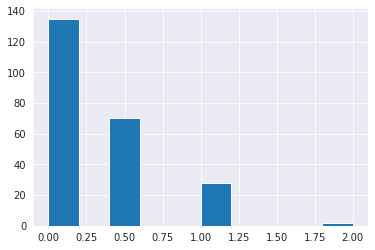

In [17]:
plt.hist(y)

In [18]:
X.head()

,M/F,Age,Educ,SES,MMSE,eTIV,nWBV
0,F,74,2.0,3.0,29.0,1344,0.743
1,F,55,4.0,1.0,29.0,1147,0.810
2,F,73,4.0,3.0,27.0,1454,0.708
8,M,74,5.0,2.0,30.0,1636,0.689
9,F,52,3.0,2.0,30.0,1321,0.827


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(188, 7) (188,)
(47, 7) (47,)


In [20]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder=OneHotEncoder(handle_unknown='ignore')

#fit the encoder to training data, and transform training and test data
OH_train_data=encoder.fit_transform(X_train[['M/F']]).toarray()
OH_test_data=encoder.transform(X_test[['M/F']]).toarray()
categories=encoder.categories_[0].tolist()

OH_train_data=pd.DataFrame(OH_train_data,columns=categories)
OH_test_data=pd.DataFrame(OH_test_data,columns=categories)

OH_train_data.index = X_train.index
OH_test_data.index = X_test.index

#remove original M/F column from X 
num_X_train=X_train.drop('M/F', axis=1)
num_X_test=X_test.drop('M/F', axis=1)

#concatenate one hot encoded series to X
OH_X_train = pd.concat([num_X_train, OH_train_data], axis=1)
OH_X_test = pd.concat([num_X_test, OH_test_data], axis=1)


In [21]:
#impute missing values for SES using KNN
from sklearn.impute import KNNImputer

imputer=KNNImputer()
imp_train_data=pd.DataFrame(imputer.fit_transform(X_train[['SES']]))
imp_test_data=pd.DataFrame(imputer.transform(X_test[['SES']]))

imp_train_data.index = X_train.index
imp_test_data.index = X_test.index

#replace previous column with new imputed column
OH_X_train['SES']=imp_train_data
OH_X_test['SES']=imp_test_data

In [22]:
#MMSE, nWBV, eTIV all appear to be normally distributed so we will use standard scaler
scaler=StandardScaler()

num_cols=['MMSE', 'nWBV', 'eTIV']
scaled_X_train=pd.DataFrame(scaler.fit_transform(X_train[num_cols]))
scaled_X_test=pd.DataFrame(scaler.transform(X_test[num_cols]))

scaled_X_train.index = X_train.index
scaled_X_test.index = X_test.index

OH_X_train[num_cols]=scaled_X_train
OH_X_test[num_cols]=scaled_X_test

In [23]:
#renaming final processed datasets
X_train_processed=OH_X_train.copy()
X_test_processed=OH_X_test.copy()


In [24]:
#target data is currently in 4 categories: 0, 0.5, 1 and 2. Since 0.5 is a float and not an int, classifier models won't like this
#we will need to map output to new values

y_train_processed=y_train.map({0:0, 0.5:1, 1:2, 2:3}).astype(int)
y_test_processed=y_test.map({0:0, 0.5:1, 1:2, 2:3}).astype(int)
#new output for CDR is 0, 1, 2, 3 instead of 0, 0.5, 1, and 2

##Testing Models

Going to test performance of Random Forest, Logistic Regression, and XGBoost.
1. Improve hyperparameters for each model
2. Compare accuracies for the best version of each model

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

forest=RandomForestClassifier()
logistic=LogisticRegression()
xgb=XGBClassifier()

In [82]:
#function to evaluate model performance
from sklearn.metrics import balanced_accuracy_score

def evaluate(model, X_test, y_test):
  preds=model.predict(X_test)
  BAS=balanced_accuracy_score(y_test, preds, adjusted=True)
  print('Adjusted Balanced Accuracy = {:0.2f}.'.format(BAS))
  return BAS

Find a set of decent hyperparameters for each randomforestclassifier with randomizedsearchCV
using this tutorial: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [56]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [59]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
forest_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
forest_random.fit(X_train_processed, y_train_processed)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [60]:
forest_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [83]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train_processed, y_train_processed)
base_accuracy = evaluate(base_model, X_test_processed, y_test_processed)

best_random = forest_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_processed, y_test_processed)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Adjusted Balanced Accuracy = 0.26.
Adjusted Balanced Accuracy = 0.14.
Improvement of -47.75%.


Model Comparison
